In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import earthpy as et
import datetime
import matplotlib.ticker

# Handle data time conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
path_to_working_directory = os.path.join(et.io.HOME, "earth-analytics", "LCRWS")

if os.path.exists(path_to_working_directory):
    print("Path exists, set as working directory")
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))
else:
    print("Path does not exist, creating directories")
    os.mkdir(path_to_working_directory)
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))

Path exists, set as working directory


In [3]:
budget_path = os.path.join(path_to_working_directory,'data', "LewisandClark_Redesigned_local.csv")

In [4]:
budget_df = pd.read_csv(budget_path)
budget_df.columns

Index(['time', 'period', 'step', 'zon', 'storage_in', 'ch_in', 'wells_in',
       'river_in', 'hd_in', 'recharge_in', 'other_zones_in', 'total_in',
       'stoarge_out', 'ch_out', 'wells_out', 'river_out', 'hd_out',
       'recharge_out', 'other_zones_out', 'total_out', 'in_out',
       'perecent_error', 'z1_in', 'z2_in', 'z3_in', 'z4_in', 'z5_in', 'z6_in',
       'z7_in', 'z1_out', 'z2_out', 'z3_out', 'z4_out', 'z5_out', 'z6_out',
       'z7_out'],
      dtype='object')

In [59]:
budget_df["river_contribution"] = ((budget_df["river_in"])/(budget_df["wells_out"]))-(budget_df['total_in']/budget_df['total_out'])*100
budget_df.sort_values(by=["period","step","zon"],ascending=True)
budget_df.max()
budget_df["river_contribution_2"] = (budget_df["river_in"]/budget_df["total_in"]*100)
budget_df["river_contribution_3"] = (budget_df['wells_out'])/(budget_df["river_in"]-budget_df["river_out"])
budget_df["well_contribution"] = (budget_df["wells_out"]/budget_df['total_out']*100)
budget_df["total_contribution"] = budget_df['river_contribution_2']/budget_df["well_contribution"]
budget_df["storage_contribution"] = budget_df['stoarge_out']/budget_df['total_out']
df = budget_df.groupby(['zon']).agg({'river_contribution_2':['mean']})
dg = budget_df.groupby(['zon']).agg({'well_contribution':["mean"]})
dz = budget_df.groupby(['zon']).agg({'river_contribution':['mean']})
dq = budget_df.groupby(['zon']).agg({'river_contribution_3':['mean']})
df,dz


(    river_contribution_2
                     mean
 zon                     
 1.0            69.134677
 2.0            82.129784
 3.0            80.353115
 4.0            80.224938
 5.0            78.396927
 6.0            61.283598,
     river_contribution
                   mean
 zon                   
 1.0         -99.198441
 2.0         -99.152862
 3.0         -99.089629
 4.0         -99.137401
 5.0         -99.093725
 6.0         -99.301083)

In [22]:
# Break zones it separate dataframes
budget_list=[]
numbers_list = [1,2,3,4,5,6]
for i in numbers_list:
    df = budget_df[budget_df['zon']==i]
    budget_list.append(df)
budget_list[0]

,time,period,step,zon,storage_in,ch_in,wells_in,river_in,hd_in,recharge_in,...,z4_out,z5_out,z6_out,z7_out,river_contribution,river_contribution_2,river_contribution_3,well_contribution,total_contribution,storage_contribution
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,208000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,79.087452,70.508475,1.308328,89.152542,0.790875,0.000000
1,0.1,2.0,1.0,1.0,61.5,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,78.707224,70.169492,1.314803,89.152542,0.787072,0.000046
2,0.2,2.0,2.0,1.0,53.6,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,78.707224,70.169492,1.314803,89.152542,0.787072,0.000047
3,0.3,2.0,3.0,1.0,52.5,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,78.707224,70.169492,1.314803,89.152542,0.787072,0.000049
4,0.4,2.0,4.0,1.0,46.6,0.0,0.0,207000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,78.707224,70.169492,1.314803,89.152542,0.787072,0.000052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,30.6,32.0,6.0,1.0,5160.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24500.0,76.512456,68.690096,1.350118,89.776358,0.765125,0.000009
307,30.7,32.0,7.0,1.0,4590.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,76.512456,68.690096,1.350053,89.776358,0.765125,0.000007
308,30.8,32.0,8.0,1.0,4100.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,76.512456,68.690096,1.349988,89.776358,0.765125,0.000008
309,30.9,32.0,9.0,1.0,3680.0,0.0,0.0,215000.0,0.0,212.0,...,0.0,0.0,0.0,24600.0,76.512456,68.690096,1.349988,89.776358,0.765125,0.000008


In [36]:
budget_z1 = budget_list[0]
df = budget_z1[budget_z1['time']==0]
value = df['river_in'].values
value[0]

208000.0

In [41]:
# Get init river values for constants
init_river_list=[]
for i in budget_list:
    df = i[i['time']==0]
    value = df['river_in'].values
    init_river_list.append(value[0])
init_river_list

[208000.0, 224000.0, 239000.0, 663000.0, 522000.0, 274000.0]

In [55]:
# subract init values from all other values
corrected_df_list=[]
out_path = os.path.join('corrected_df.csv')
for count, df in enumerate(budget_list):
    
    df['river_corrected'] = (init_river_list[count]-df['river_in'])
    df['river_percentage'] = (df['river_corrected']/df['wells_out'])*100
    temp_df = df
    corrected_df_list.append(temp_df)
    corrected_df=pd.concat(corrected_df_list)
corrected_df.to_csv(out_path)

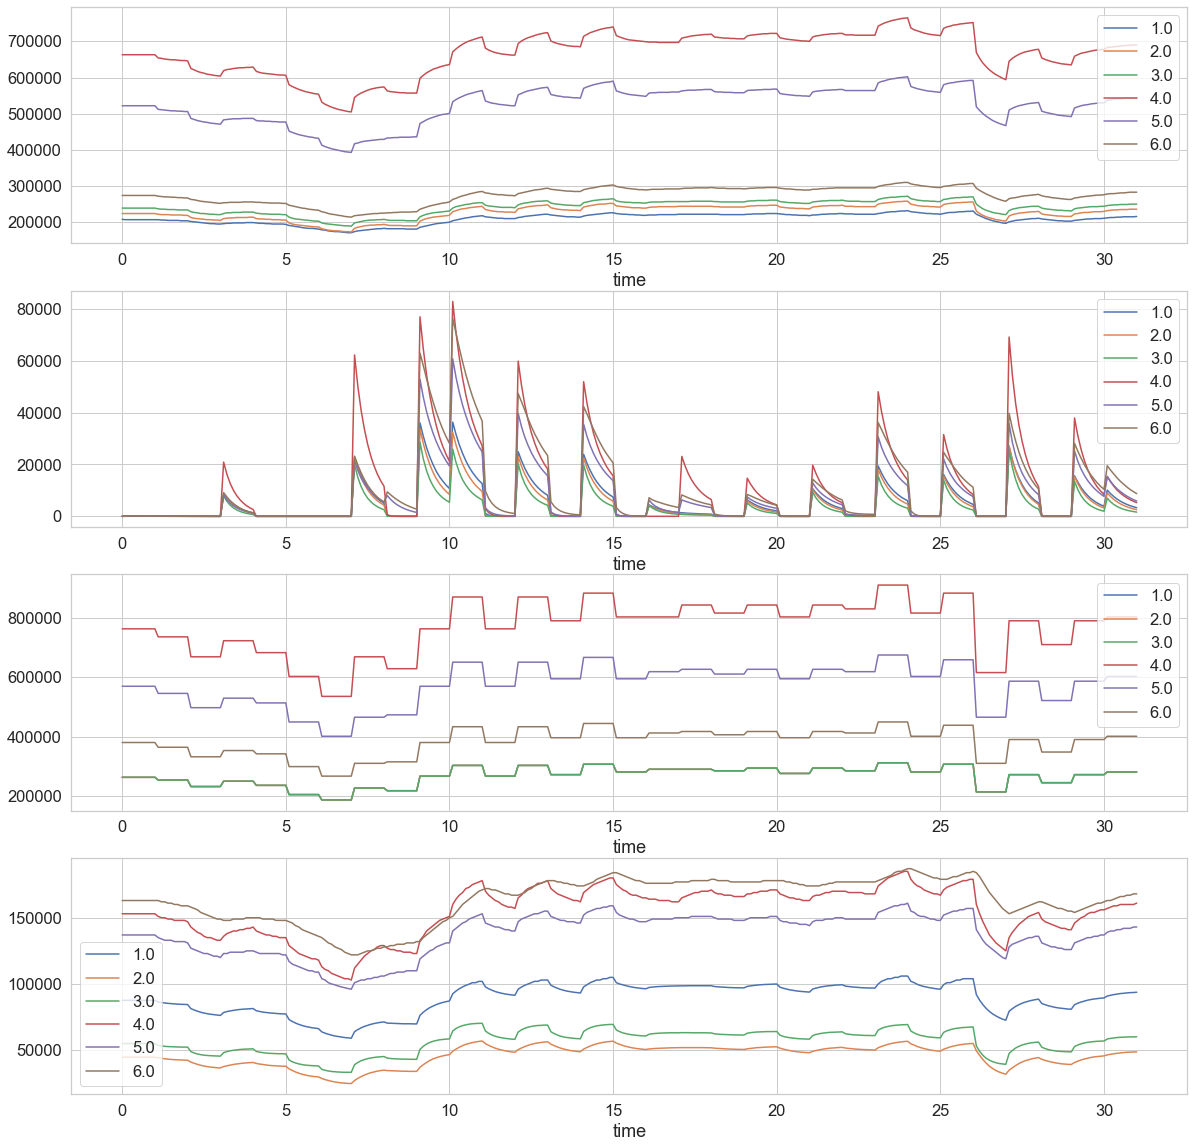

In [7]:
fig, (ax,ax1,ax3,ax4)= plt.subplots(4,1,figsize=(20,20))

for i, k in budget_df.groupby('zon'):
    k.groupby("zon").plot(x="time",
                           y="river_in",
                           label=i,
                           ax=ax)
    
for p, o in budget_df.groupby('zon'):
    o.groupby("zon").plot(x="time",
                          y="storage_in",
                          label=p,
                          ax=ax1)
    
for g, q in budget_df.groupby('zon'):
    q.groupby("zon").plot(x='time',
                          y="wells_out",
                          label=g,
                          ax=ax3)
    
for r, s in budget_df.groupby('zon'):
    s.groupby("zon").plot(x='time',
                          y="other_zones_in",
                          label=r,
                          ax=ax4)

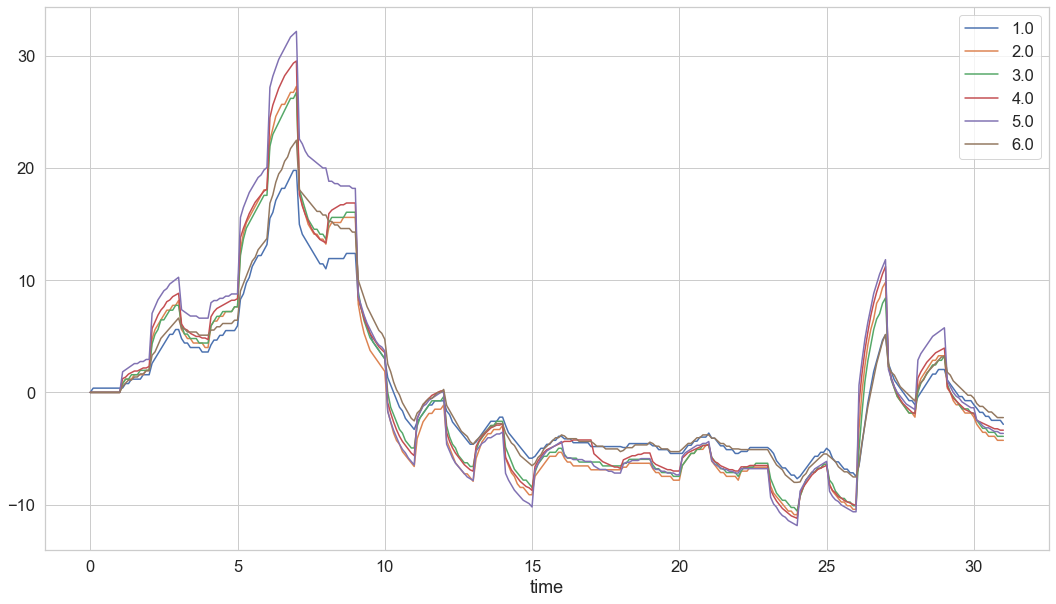

In [54]:
fig, ax = plt.subplots(figsize=(18,10))
for i, k in corrected_df.groupby('zon'):
    k.groupby("zon").plot(x="time",
                           y="river_percentage",
                           label=i,
                           ax=ax)